# Laboratorio 1

### Marcela Bethancourt - 09000253

### Problema 1

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [15]:
img = cv2.imread("stitch.jpeg", cv2.IMREAD_GRAYSCALE)
img

array([[176, 175, 176, ..., 174, 174, 172],
       [174, 175, 177, ..., 174, 173, 172],
       [173, 173, 175, ..., 175, 174, 173],
       ...,
       [179, 178, 177, ..., 170, 167, 162],
       [181, 179, 179, ..., 170, 169, 166],
       [180, 178, 177, ..., 166, 166, 165]], dtype=uint8)

In [16]:
imagen = cv2.imread("stitch.jpeg")

# Separar los canales
b, g, r = cv2.split(imagen)

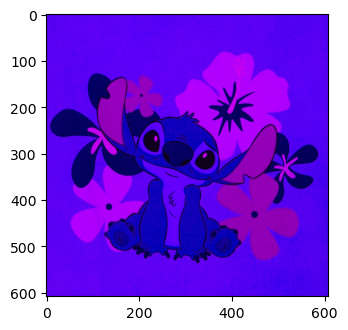

In [26]:
def problema1(imagen, color):
    # Copia de imagen
    imagenp = np.zeros_like(imagen)
    
    if color == 1:
        solo_azul = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])
        imagenp= solo_azul
    elif color == 2:
        solo_verde = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
        imagenp = solo_verde
    elif color == 3:
        solo_rojo = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
        imagenp = solo_rojo
    elif color == 10:
        # Rojo y verde
        imagenp[:, :, 1] = imagen[:, :, 1]
        imagenp[:, :, 2] = imagen[:, :, 2]
    elif color == 20:
        # Verde y azul
        imagenp[:, :, 0] = imagen[:, :, 0]
        imagenp[:, :, 1] = imagen[:, :, 1]
    elif color == 30:
        # Rojo y azul
        imagenp[:, :, 0] = imagen[:, :, 0]
        imagenp[:, :, 2] = imagen[:, :, 2]
        
    return imagenp

def show2(imagen_nueva):
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_nueva, cv2.COLOR_BGR2RGB))
  
    plt.show()

imagen_nueva= problema1(imagen, 30)

show2(imagen_nueva)

### Problema 2

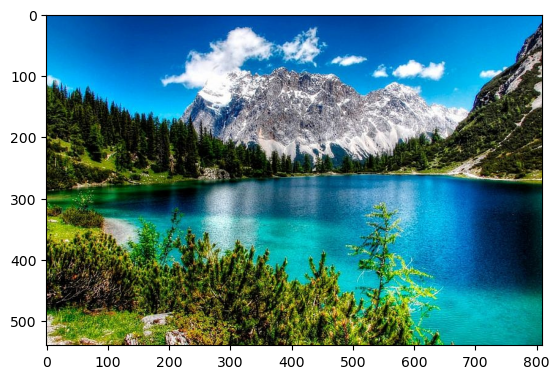

In [28]:
def combinar_canales(ruta_rojo, ruta_verde, ruta_azul, ruta_salida):
    # Cargar las imágenes en escala de grises
    rojo = cv2.imread(ruta_rojo, cv2.IMREAD_GRAYSCALE)
    verde = cv2.imread(ruta_verde, cv2.IMREAD_GRAYSCALE)
    azul = cv2.imread(ruta_azul, cv2.IMREAD_GRAYSCALE)
    
    # Combinar las imágenes en una imagen RGB
    imagen_color = cv2.merge([azul, verde, rojo])
    
    # Guardar la imagen resultante
    cv2.imwrite(ruta_salida, imagen_color)
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
  
    plt.show()

# llamar funcion
combinar_canales("imagen1_salida_gray_rojo.jpg", "imagen1_salida_gray_verde.jpg", "imagen1_salida_gray_azul.jpg", "imagen_color.jpg")
#combinar_canales("imagen2_salida_gray_rojo.jpg", "imagen2_salida_gray_verde.jpg", "imagen2#_salida_gray_azul.jpg", "imagen_color.jpg")
#combinar_canales("perro_salida_gray_rojo.jpg", "perro_salida_gray_verde.jpg", "perro_salida_gray_azul.jpg", "imagen_color.jpg")

### Problema 3

In [34]:
def crear_imagenes_grises(ruta_imagen, ruta_salida_rojo, ruta_salida_verde, ruta_salida_azul):
    # Cargar la imagen a color
    imagen = cv2.imread(ruta_imagen)
    
    imagen1 = np.zeros_like(imagen)
    imagen2 = np.zeros_like(imagen)
    imagen3 = np.zeros_like(imagen)
    
    # Separar los canales
    b, g, r = cv2.split(imagen)
    
    # Guardar las imágenes en escala de grises
    cv2.imwrite(ruta_salida_rojo, r)
    cv2.imwrite(ruta_salida_verde, g)
    cv2.imwrite(ruta_salida_azul, b)


# llamar funcion
crear_imagenes_grises("nature.jpeg", "rojo.jpg", "verde.jpg", "azul.jpg")

### Problema 4

In [35]:
import matplotlib.pyplot as plt

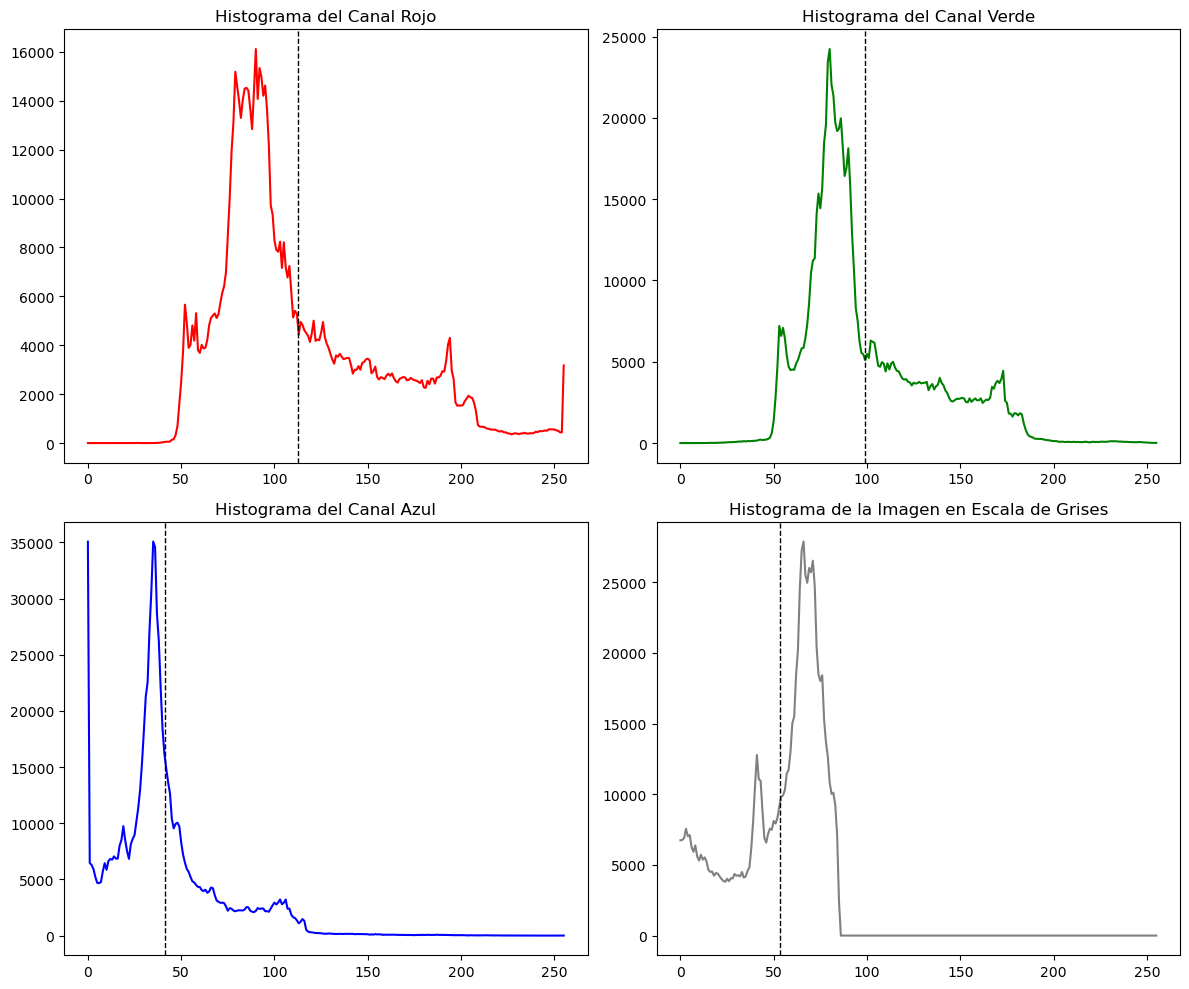

In [36]:
def mostrar_histogramas(ruta_imagen):
    # Cargar la imagen
    imagen = Image.open(ruta_imagen).convert("RGB")
    
    # Separar los canales
    r, g, b = imagen.split()
    
    # Convertir los canales a arrays numpy
    r = np.array(r)
    g = np.array(g)
    b = np.array(b)
    
    # Crear la imagen en escala de grises usando el promedio aritmético
    gris = (r + g + b) // 3
    
    # Calcular los histogramas
    hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))
    hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
    hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))
    hist_gris, bins_gris = np.histogram(gris, bins=256, range=(0, 256))
    
    # Calcular las medias
    media_r = np.mean(r)
    media_g = np.mean(g)
    media_b = np.mean(b)
    media_gris = np.mean(gris)
    
    # Crear los plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Histograma del canal rojo
    axs[0, 0].plot(hist_r, color='red')
    axs[0, 0].axvline(media_r, color='k', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title('Histograma del Canal Rojo')
    
    # Histograma del canal verde
    axs[0, 1].plot(hist_g, color='green')
    axs[0, 1].axvline(media_g, color='k', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title('Histograma del Canal Verde')
    
    # Histograma del canal azul
    axs[1, 0].plot(hist_b, color='blue')
    axs[1, 0].axvline(media_b, color='k', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title('Histograma del Canal Azul')
    
    # Histograma de la imagen en escala de grises
    axs[1, 1].plot(hist_gris, color='gray')
    axs[1, 1].axvline(media_gris, color='k', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title('Histograma de la Imagen en Escala de Grises')
    
    # Mostrar los plots
    plt.tight_layout()
    plt.show()

# llamada de funcion
mostrar_histogramas("bird.jpg")

### Problema 5

#### Enfoque de escala de grises ponderado

La escala de grises ponderada es una técnica para convertir una imagen en color a una imagen en escala de grises que toma en cuenta la percepción humana de los colores. En lugar de usar un promedio aritmético simple de los valores de los canales rojo, verde y azul (R, G, B), se utiliza una combinación ponderada de estos canales para reflejar mejor cómo el ojo humano percibe el brillo.

Gris=0.299×R+0.587×G+0.114×B


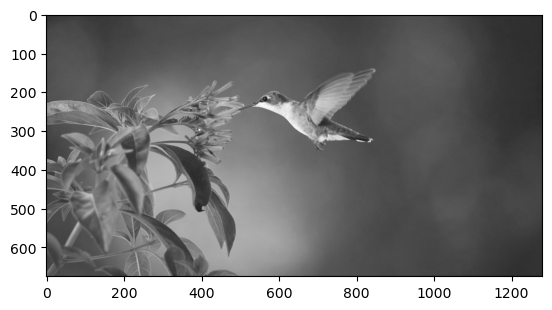

In [44]:
def convertir_a_gris_ponderado(ruta_imagen, ruta_salida):
    # Cargar la imagen a color
    imagen = Image.open(ruta_imagen).convert("RGB")
    
    # Separar los canales
    r, g, b = imagen.split()
    
    # Convertir los canales a arrays numpy
    r = np.array(r, dtype=float)
    g = np.array(g, dtype=float)
    b = np.array(b, dtype=float)
    
    # Crear la imagen en escala de grises ponderada
    gris_ponderado = 0.299 * r + 0.587 * g + 0.114 * b
    
    # Convertir el resultado a un array numpy de tipo uint8
    gris_ponderado = gris_ponderado.astype(np.uint8)
    
    # Convertir el array numpy de vuelta a una imagen Pillow
    imagen_gris_ponderado = Image.fromarray(gris_ponderado)
    
    # Mostrar la imagen resultante
    imagen_gris_ponderado2 = imagen_gris_ponderado.convert("RGB")
    plt.imshow(imagen_gris_ponderado2)
    plt.show()  
 
    imagen_gris_ponderado.save(ruta_salida)

# llama a funcion
convertir_a_gris_ponderado("bird.jpg", "imagen_gris_ponderado.jpg")

### Problema 6

#### Color HSV

Se trata de una transformación no lineal del espacio de color RGB, y se puede usar en progresiones de color.
Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

#### Canales:
El modelo de color HSL se compone de tres canales:

- Canal H:
HUE. Se traduce como “tono”, “tonalidad”, “matiz”. Representa los colores primarios (rojo, verde, azul) con todos los matices intermedios que podemos percibir cuando los situamos en el círculo cromático (naranjas, amarillos, morados…). Los valores de tono se refieren mediante su posición en el círculo cromático. Queda normalizado que el rojo primario se sitúa a 0º, el verde primario a 120º y el azul primario a 240º, volviendo al rojo cuando regresamos al origen del círculo a 360º.

- Canal L:
LIGTHNESS. Traducido directamente como “luminosidad” pero también como “claridad”. Podríamos entenderlo como la cantidad de luz. Cualquier color al aumentar su cantidad de luz tiende al blanco. Si, por el contrario, la cantidad de luz disminuye tenderá al negro. El valor máximo de luminosidad de cualquier color es el blanco. El valor mínimo será el negro. El rango de valores de este canal se suele referir como un porcentaje: 0% luminosidad mínima (negro) y 100% luminosidad máxima (blanco). También se puede referir como un rango de valores entre 0 y 1.

- Canal S:
SATURATION. Sin ambigüedades en su traducción como “saturación”. Evitando entrar en las farragosas definiciones de los teóricos del color, podemos decir que representa la cantidad de color. De tal manera que si cualquier color pierde saturación tiende hacia el gris. Si la gana, se aleja del gris y gana “color”. El valor mínimo de saturación para cualquier color es el gris, mientras que el máximo es el color más puro, más “intenso”. Al igual que la luminosidad, este canal se suele representar como un porcentaje o un rango de valores entre 0 y 1.